In [1]:
# 分類 classification
# 載入資料-->檢視資料-->資料標準化-->訓練資料+驗證資料-->定義模型-->訓練模型-->驗證模型
bool_ss = True # True 資料標準化

In [2]:
# 載入資料 --> 手寫辨識
from sklearn import datasets
# print(dir(datasets))
mnist = datasets.load_digits()
print(mnist.keys())
X, y = mnist.data, mnist.target

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


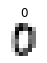

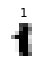

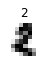

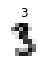

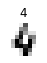

In [3]:
# 檢視資料
import matplotlib.pyplot as plt
for i in range(5):
    plt.figure( figsize=(0.6, 0.6) )
    plt.imshow( X[i].reshape(8,8), cmap='gray_r' )
    plt.title(y[i])
    plt.axis('off')
    plt.show()

In [4]:
# 資料標準化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
if bool_ss :
    X_ss = ss.fit_transform(X)
else:
    X_ss = X

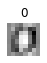

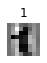

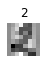

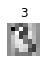

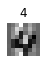

In [5]:
# 資料標準化 --> 檢視資料
import matplotlib.pyplot as plt
for i in range(5):
    plt.figure( figsize=(0.6, 0.6) )
    plt.imshow( X_ss[i].reshape(8,8), cmap='gray_r' )
    plt.title(y[i])
    plt.axis('off')
    plt.show()

In [6]:
# 訓練資料 + 驗證資料
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.2, random_state=42)

In [7]:
# 定義模型 + 訓練模型
# 羅吉斯回歸
# https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
# model = LogisticRegression()
# model = AdaBoostClassifier(n_estimators=100)
model = XGBClassifier()
model.fit(X_train, y_train)

c:\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:39:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [8]:
# 驗證模型
if bool_ss:
    print('StandardScaler', model.score(X_test, y_test))
else:
    print('Normal Data', model.score(X_test, y_test))



StandardScaler 0.9694444444444444
